In [1]:
%pip install concrete-ml
%pip install kagglehub[pandas-datasets]
%pip install kagglehub
%pip install seaborn
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from fhe_model_evaluator import FHEModelEvaluator

Processing data...
Dataset shape: (284807, 31)
Target distribution: Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64
Training set: (227845, 30), Test set: (56962, 30)

Performing grid search for optimal parameters...

Grid search for LR...
Performing grid search for LR model...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9066

Grid search for RF...
Performing grid search for RF model...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 100}
Best score: 0.9093

Grid search for DT...
Performing grid search for DT model...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.8987

Evaluating FHE vs plain text models...

----------------------------------------------------------------------

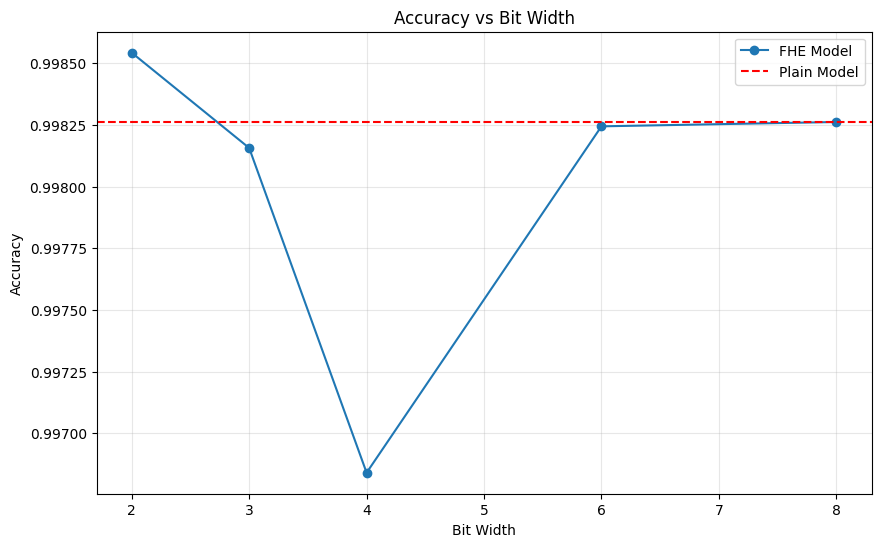

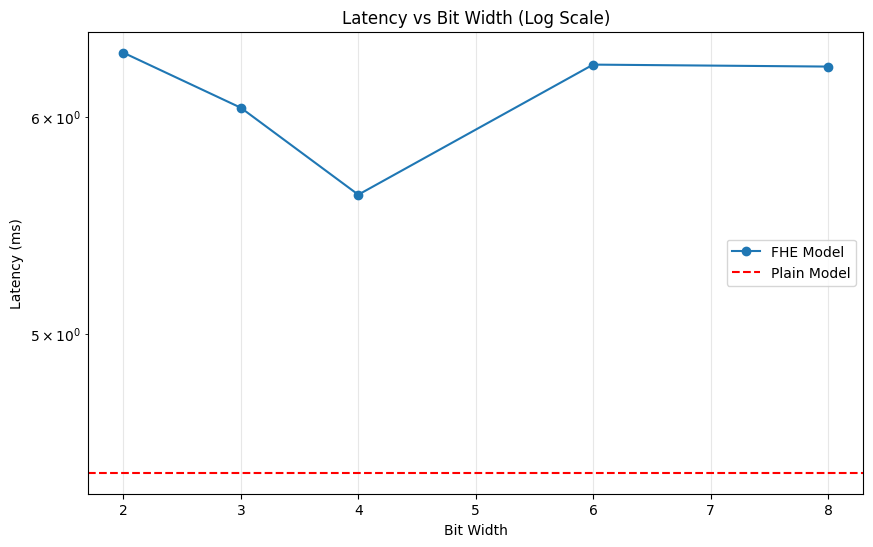

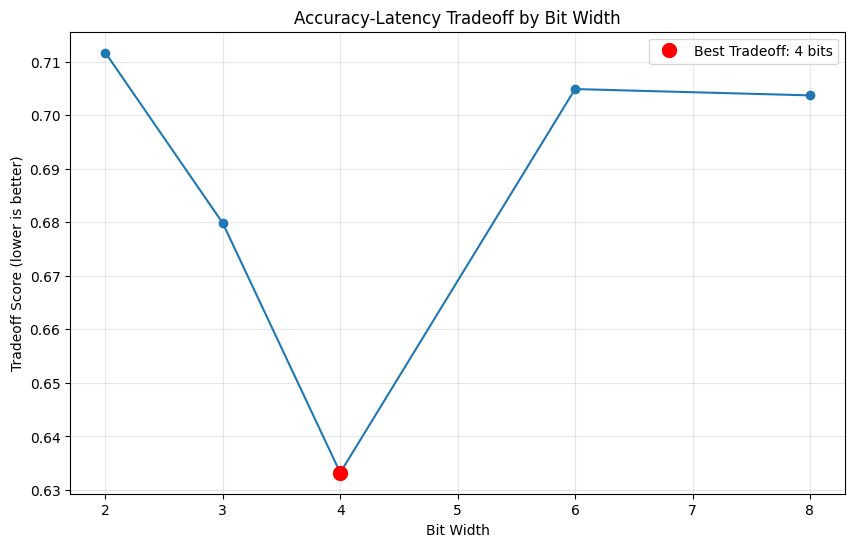

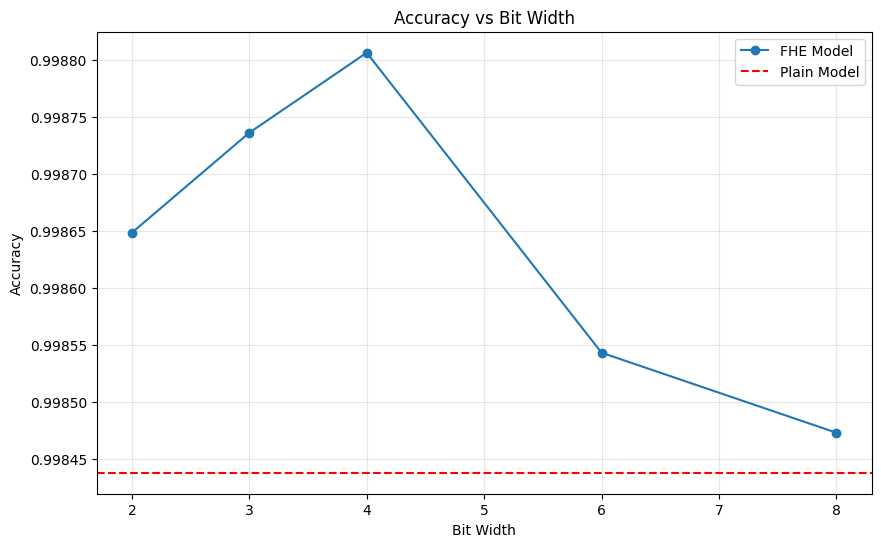

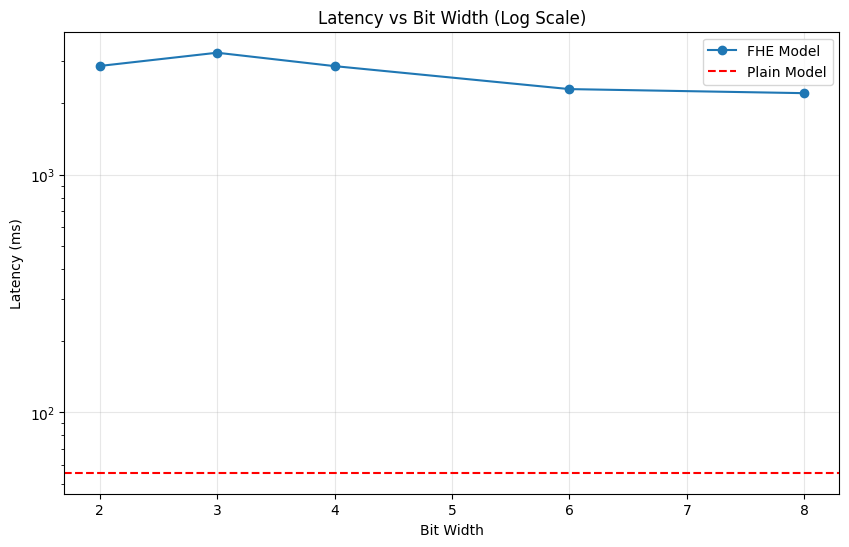

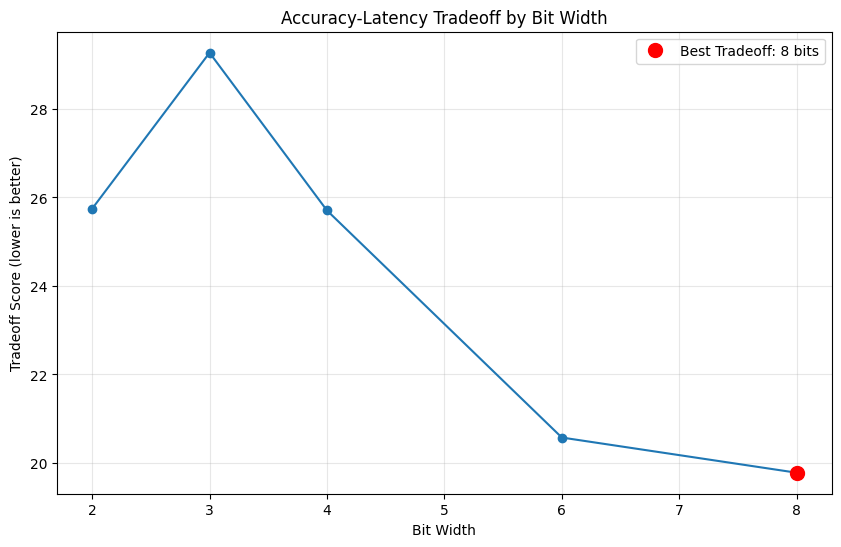

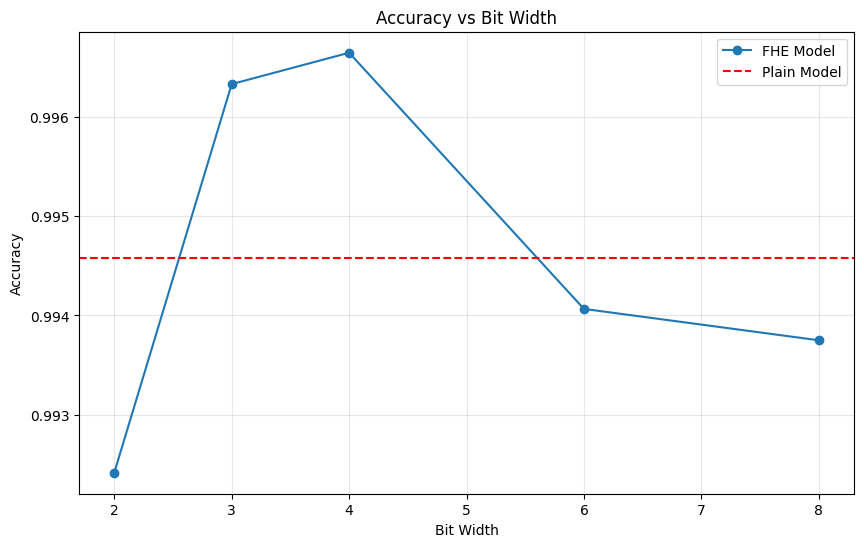

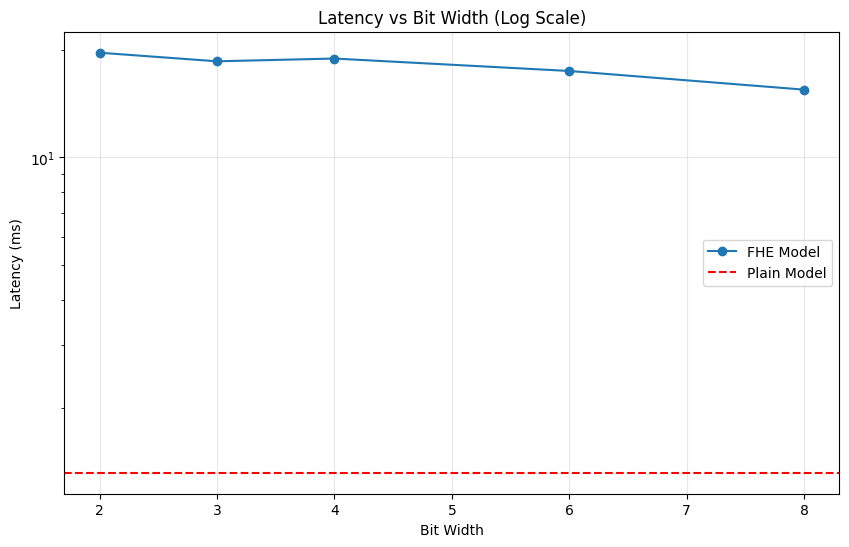

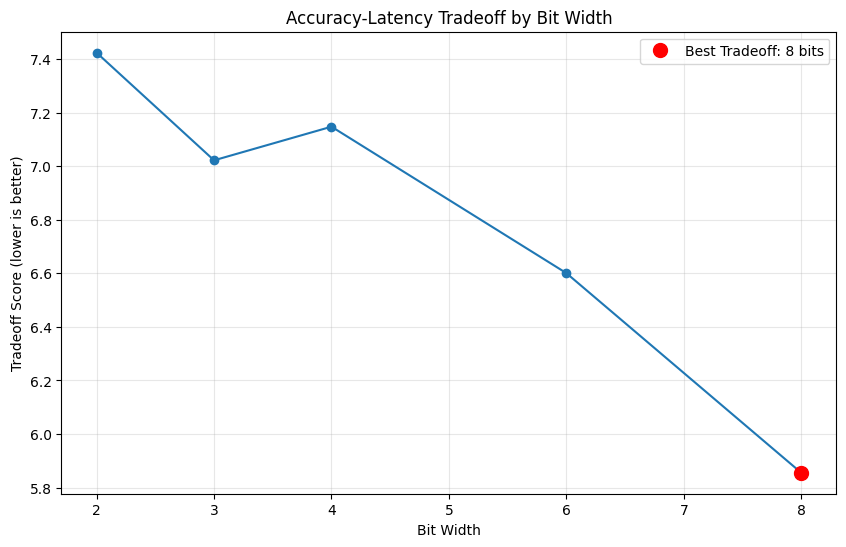

<Figure size 640x480 with 0 Axes>

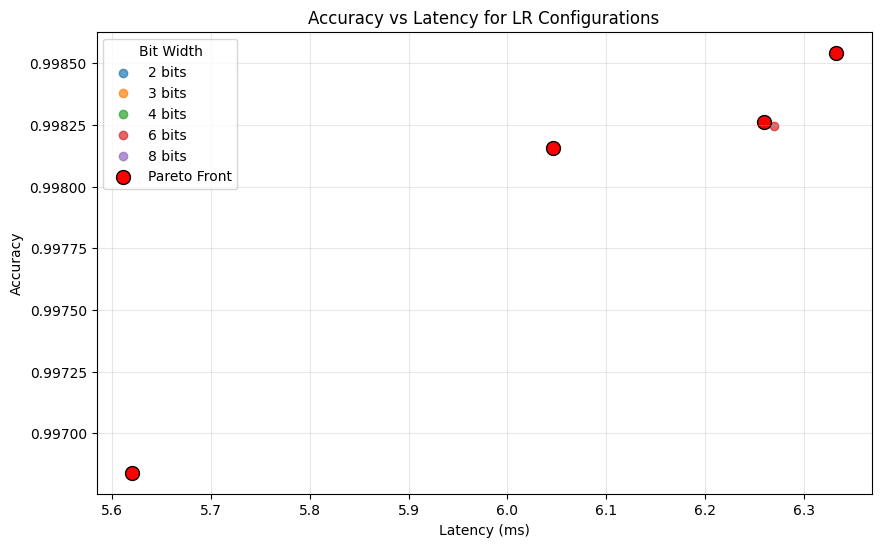

Generating 'Accuracy vs Latency' plot for RF...


<Figure size 640x480 with 0 Axes>

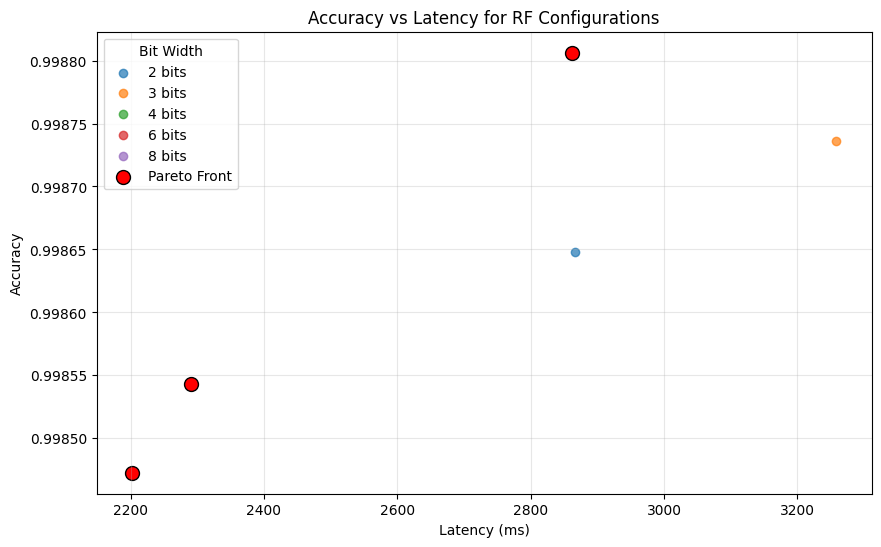

Generating 'Accuracy vs Latency' plot for DT...


<Figure size 640x480 with 0 Axes>

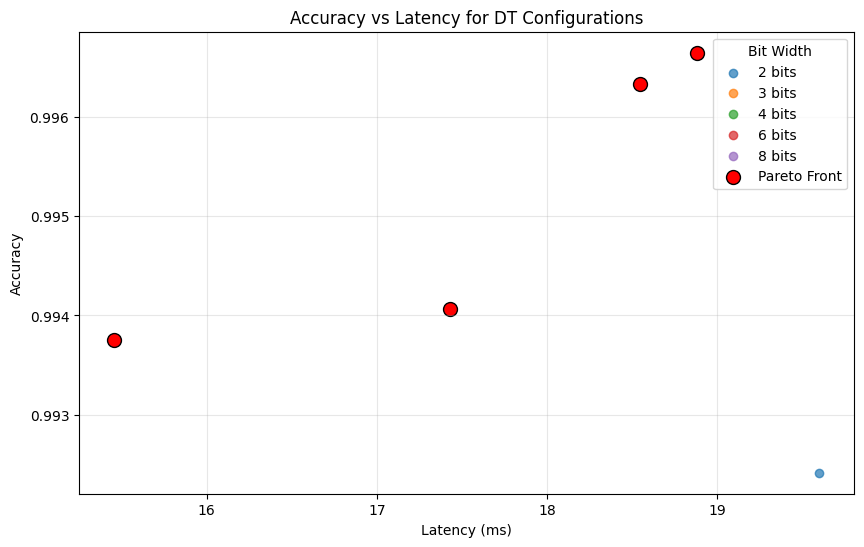

Saved 'Accuracy vs Latency' plots to folder: 'results'

Writing summary report to results/fhe_evaluation_report.txt...


TypeError: unsupported format string passed to Series.__format__

In [5]:

df = pd.read_csv('creditcard.csv')

evaluator = FHEModelEvaluator(
    data=df,                    
    target_column='Class',    
    random_state=42,
    verbose=True,
    test_size=0.2,
    undersampling_ratio=0.1,
    scaling=True,
    model_types=['lr', 'rf', 'dt'],
    bit_widths=[2, 3, 4, 6, 8],
    cv_folds=3,
    n_iterations=50
)

results = evaluator.run_full_pipeline()

acc_fig, latency_fig, model_figures = evaluator.generate_report()